In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import os
%matplotlib inline

In [11]:
#task1:output data_counts\columns\nan_counts
#os.chdir(r'C:\Users\everi\Desktop\Code\Python\Py2021\Lesson-15\') 
path = 'C:/Users/everi/Desktop/Code/Python/Py2021/Lesson-15/'
folder = os.walk(path)
files = list(folder)[0][2]
n = 1
for i in files:
    file = path + i
    data = pd.read_excel(file) #read_excel
    data_counts = len(data)  #data number
    columns = data.columns.tolist() #output column
    nan_counts = len(data[data.isnull().values == True])  # missing data ==nan
    print('The data_counts of  %i th data is：%i' % (n, data_counts))
    print('The columns of %i data is：' % n,columns)
    print('The nan_counts %i  data is：：%i' % (n, nan_counts))
    n += 1
print("finished")

The data_counts of  1 th data is：31
The columns of 1 data is： ['date', 'productA', 'productB']
The nan_counts 1  data is：：3
The data_counts of  2 th data is：28
The columns of 2 data is： ['date', 'productA', 'productB']
The nan_counts 2  data is：：4
The data_counts of  3 th data is：31
The columns of 3 data is： ['date', 'productA', 'productB']
The nan_counts 3  data is：：3
finished


              productA    productB
date                              
2018-01-01  270.997943  371.615646
2018-01-02  638.322113  788.081579
2018-01-03  364.454658  454.279288
2018-01-04  251.432000  340.337651
2018-01-05  261.411794  419.372368 
-----
The date that exceeds 80% in product A is
 ['2018-01-26 00:00:00', '2018-02-23 00:00:00', '2018-03-25 00:00:00']


['2018-01-26 00:00:00', '2018-02-23 00:00:00', '2018-03-25 00:00:00']

<Figure size 432x288 with 0 Axes>

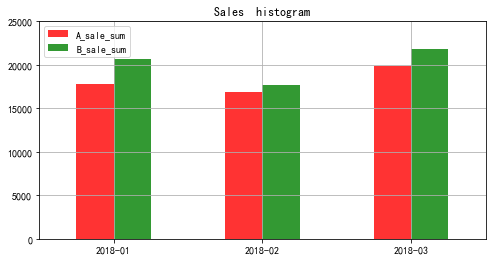

In [14]:
# 1. change date to_period and output Dataframe with data1,data2,data3
def f2_1():
    path = 'C:/Users/everi/Desktop/Code/Python/Py2021/Lesson-15/'
    folder = os.walk(path)  
    files = list(folder)[0][2]
    data_files = []
    for i in files:
        file = path + i
        data = pd.read_excel(file,index_col = 0)
        columns = data.columns.tolist()  # Extract column name
        data.to_period()  # change date to time series
        data[columns[0]].fillna(data[columns[0]].mean(),inplace = True)  
        data[columns[1]].fillna(data[columns[1]].mean(),inplace = True)
        #  fill missing value with mean
        data_files.append(data)
    return(data_files)


# 1.Calculate the total monthly sales of products A and B
# 2.Draw multi series histogram & save
 
def f2_2(*data_files):
    path = 'C:/Users/everi/Desktop/Code/Python/Py2021/Lesson-15/'
    A_sale = []
    B_sale = []
    for data in data_files:
        columns = data.columns #Extract column name
        A_sale.append(data[columns[0]].sum())   # Update total sales of product A
        B_sale.append(data[columns[1]].sum())   # B
    df = pd.DataFrame({'A_sale_sum': A_sale,'B_sale_sum':B_sale},
                     index = pd.period_range('201801','201803',freq = 'M'))
    #print(df)   
    plt.figure()
    df.plot(kind = 'bar',style = '--o',color = ['r','g'],alpha = 0.8, rot = 0,figsize = (8,4))
    plt.title('Sales  histogram')
    plt.ylim([0,25000])
    plt.legend(loc = 'upper left')
    plt.grid()
    plt.savefig(path + 'Products A,B Histogram.png',dpi=400)
    

    
# Record the date when the sales volume exceeds 80%  
def f2_3(*data_files):
    keydates = []
    for data in data_files:
        columns = data.columns 
        data['A_sale_sum%'] = data[columns[0]].cumsum() / data[columns[0]].sum()  
        keydate = data[data['A_sale_sum%']>0.8].index[0]  
        keydates.append(str(keydate))
    print('The date that exceeds 80% in product A is\n', keydates)
    return(keydates)


f2_1()
data1, data2, data3 = f2_1()[0], f2_1()[1], f2_1()[2]
print(data1.head(),'\n-----')
f2_2(data1,data2,data3)
f2_3(data1,data2,data3)

 View AB product sales relationship
-------


<ipython-input-17-ec8e8a66e32c>:25: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  model.fit(data['productA'][:,np.newaxis],data['productB'])


array([1303.84193309])

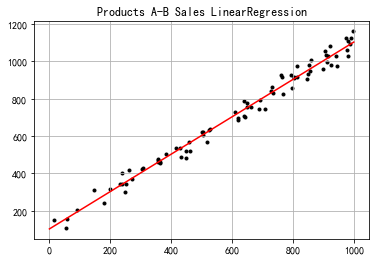

In [17]:
#1.delete missing values,Convert date to time series

def f3_1():
    path = 'C:/Users/everi/Desktop/Code/Python/Py2021/Lesson-15/'
    folder = os.walk(path)  
    files = list(folder)[0][2]
    data_files = []
    for i in files:
        file = path + i
        data = pd.read_excel(file,index_col = 0)
        columns = data.columns.tolist()  # Extract column name
        data.to_period()  # Convert to time series
        data.dropna(inplace=True)  # Delete missing values
        data_files.append(data)
    data = pd.concat([data_files[0],data_files[1],data_files[2]])  # Merge data
#     print(data)
    return(data)


#1.When the sales of product a is 1200, predict the sales volume of product B
#2.Draw scatter and store the picture
def f3_2(data):
    path = 'C:/Users/everi/Desktop/Code/Python/Py2021/'
    model = LinearRegression()
    model.fit(data['productA'][:,np.newaxis],data['productB'])  
    # build LinearRegression model
    xtest = np.linspace(0,1000,1000)
    ytest = model.predict(xtest[:,np.newaxis])
    plt.scatter(data['productA'],data['productB'],marker = '.',color = 'k')
    plt.plot(xtest,ytest,color = 'r')
    plt.grid(True)
    plt.title('Products A-B Sales LinearRegression')
#     plt.savefig(path + 'A-B sale prediction.png',dpi=400)  
    # save pic
    predict_sales = 1200
    predict_sales = np.array(predict_sales).reshape(-1, 1)
    return(model.predict(predict_sales))

f3_1()
data = f3_1()
print(' View AB product sales relationship\n-------')

f3_2(data)